# GRIP @ THE SPARK FOUNDATION

### NAME: G S SRENATH KUMAR
### Technology:Data Science & Business Analytics
### Task-1:Prediction using Supervised ML
### Hypothesis of Prediction is to :Predict the percentage of an student based on the no. of study hours.

### GRIP-JUNE21

In [1]:
#Importing all required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [8]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [13]:
df.shape

(25, 2)

# EXPLORATORY DATA ANALYSIS

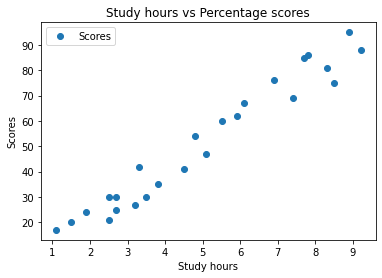

In [14]:
df.plot(x="Hours",y="Scores",style='o')
plt.title("Study hours vs Percentage scores")
plt.xlabel("Study hours")
plt.ylabel("Scores")
plt.show()

In [19]:
#Finding the correlation
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


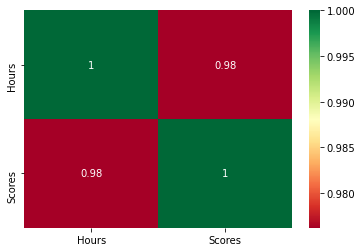

In [20]:
corr_mat=dataset.corr()
features=corr_mat.index
g=sns.heatmap(df[features].corr(),annot=True,cmap="RdYlGn")

# PREDCTION 

In [21]:
X = df.iloc[:, :-1].values  

In [22]:
Y=df.iloc[:, 1].values

In [23]:
print("X shape {}".format(X.shape))
print("Y shape {}".format(Y.shape))

X shape (25, 1)
Y shape (25,)


# Splitting the dataset into training and testing set

In [24]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [25]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training on test dataset is completed")

Training on test dataset is completed


# Ploting the best fit line of Linear Regression

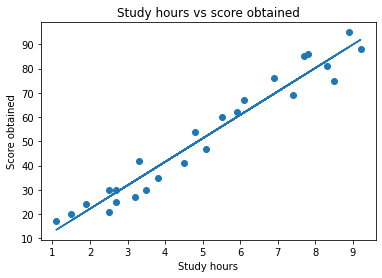

In [26]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.xlabel("Study hours")
plt.ylabel("Score obtained")
plt.title("Study hours vs score obtained")
plt.plot(X, line);
plt.show()


#  Making Predictions Using test dataset 

In [28]:
#test dataset
print(X_test) 

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [29]:
y_pred = regressor.predict(X_test) 

In [30]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


## Distplot of actual and predicted value

C:\Users\srena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

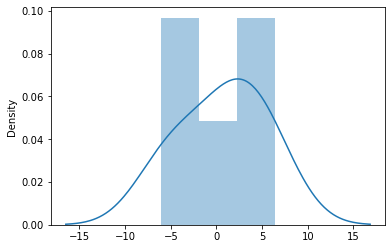

In [31]:
sns.distplot(y_test-y_pred)

# Model Evaluation

In [32]:
from sklearn import metrics


In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test,  y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.9207511902099244
MSE: 18.943211722315272
RMSE: 4.352380006653288


# Prediction of scores when student studies for 9.25 hours



In [34]:
hours = 9.25
test= np.array([hours])
test= test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = 9.25
Predicted Score = 92.38611528261494


## So if a student studies for 9.25 per day student can score 92.386%

# COMPLETED